## Import Packages

In [ ]:
import pandas            as pd
import numpy             as np
import seaborn           as sb
import scipy.stats       as sp
import matplotlib.pyplot as plt

In [ ]:
# Acess to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


.

.

.



## Load Feature Dataset (1 file)

In [ ]:
FeatureData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SavedFiles/FeatureData.csv',header=None)
FeatureData

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,1.351000,31.661000,31.832000,1.418300,1.053400,30.628000,0.992040,0.992420,1.059700,1.170800,...,0.931090,0.732910,1.016000,0.717950,0.853310,0.747490,0.718320,0.845460,0.848450,0.758330
1,-1.372000,-22.786000,-23.613000,-1.085600,-1.057500,-19.468000,-1.319600,-1.056400,-2.041700,-1.343200,...,-1.564900,-0.730310,-1.387000,-0.796880,-0.860070,-0.782290,-0.513800,-0.656270,-0.747890,-0.914290
2,0.011083,0.023339,0.020506,0.027215,0.016574,0.018563,0.020904,0.024480,0.029605,0.028426,...,0.029894,0.027896,0.032512,0.036554,0.031676,0.037731,0.036942,0.035927,0.035836,0.036279
3,0.426105,2.312749,2.313820,0.396240,0.388252,2.088591,0.403801,0.404898,0.381526,0.412919,...,0.339540,0.317581,0.335417,0.328550,0.336647,0.338766,0.265980,0.321351,0.323284,0.302785
4,0.181443,5.348262,5.353342,0.156266,0.150465,4.361866,0.162618,0.163343,0.144686,0.169694,...,0.114394,0.100079,0.111448,0.106609,0.112328,0.113339,0.069381,0.101976,0.103229,0.090362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.069441,-0.095775,-0.094919,-0.098230,-0.091625,-0.100346,-0.101488,-0.105314,-0.111518,-0.094917,...,-0.074033,-0.110826,-0.094207,-0.112633,-0.086361,-0.115580,-0.106127,-0.117642,-0.080779,-0.074024
266,-1.500603,-1.513689,-1.520788,-1.502072,-1.514240,-1.522188,-1.515150,-1.520913,-1.511260,-1.516616,...,-1.509721,-1.516912,-1.510511,-1.515570,-1.511200,-1.518307,-1.515108,-1.526302,-1.508744,-1.499973
267,1.372567,1.390663,1.361458,1.367672,1.364317,1.356064,1.355348,1.343550,1.382847,1.354853,...,1.370056,1.353368,1.383478,1.355935,1.367196,1.364669,1.350503,1.316537,1.375664,1.388699
268,1.136464,1.123389,1.128936,1.125794,1.126631,1.126265,1.125331,1.126091,1.121208,1.126622,...,1.135710,1.128869,1.126780,1.127161,1.132363,1.125013,1.128016,1.127961,1.127325,1.130289


### Declare normal & abnormal features seperately

In [ ]:
NoOfData = int(FeatureData.shape[1]/2)  # int function: convert float to integer
Normal_FeatureData   = FeatureData.iloc[:,:NoOfData]
Abnormal_FeatureData = FeatureData.iloc[:,NoOfData:]

print(Normal_FeatureData.shape)
print(Abnormal_FeatureData.shape)

(270, 180)
(270, 180)


.

.

.



## P-value calculation (t-Test)

P-value (0 ~ 1) is the representative indicator of statistical difference between two or more groups.

- low p-value (< 0.05) represents that those groups are well distinguished.
- Watch the following YouTube video to better understand about p-value.

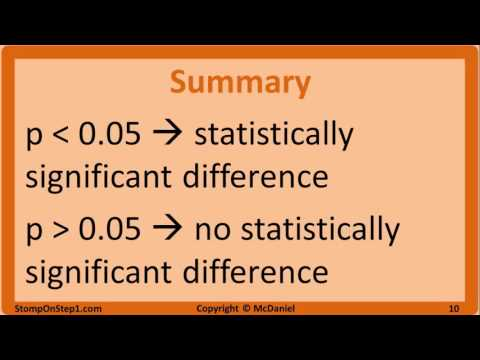

In [ ]:
from IPython.display import YouTubeVideo 
YouTubeVideo('YSwmpAmLV2s')

In [ ]:
NoOfFeature = FeatureData.shape[0] # Number of feature: 270

P_value = np.zeros((NoOfFeature , 2))

# t-Test (Result: p-value)
for i in np.arange(NoOfFeature):
    
    T_test       = np.array(sp.ttest_ind(Normal_FeatureData.iloc[i,:] , Abnormal_FeatureData.iloc[i,:]))
    P_value[i,0] = i          # Index of feature (0~269)
    P_value[i,1] = T_test[1]  # P-value
    
P_value = pd.DataFrame(P_value, columns=['No.', 'P-value'])
P_value

,No.,P-value
0,0.0,1.014879e-11
1,1.0,8.509037e-11
2,2.0,2.246947e-08
3,3.0,1.340717e-15
4,4.0,5.902344e-12
...,...,...
265,265.0,1.487181e-01
266,266.0,3.428681e-01
267,267.0,4.592642e-08
268,268.0,6.636401e-21


In [ ]:
# Sort by P-value in ascending order
P_value_Rank = P_value.sort_values(['P-value'], ascending=True)  
P_value_Rank

,No.,P-value
198,198.0,4.762393e-81
110,110.0,5.270311e-77
170,170.0,4.615377e-76
133,133.0,5.747675e-74
134,134.0,7.585991e-74
...,...,...
85,85.0,8.999631e-01
95,95.0,9.358453e-01
255,255.0,9.450087e-01
217,217.0,9.695416e-01


In [ ]:
# Save t-Test result (p-value)
path1 = '/content/drive/MyDrive/Colab Notebooks/SavedFiles/P_value.csv'
path2 = '/content/drive/MyDrive/Colab Notebooks/SavedFiles/P_value_Rank.csv'
P_value.to_csv(path1, sep=',', header=None, index=None)
P_value_Rank.to_csv(path2, sep=',', header=None, index=None)

.

.

.



## Confirm PDF(Probabilistic Density Function) Graphs (Normal vs Abnormal)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


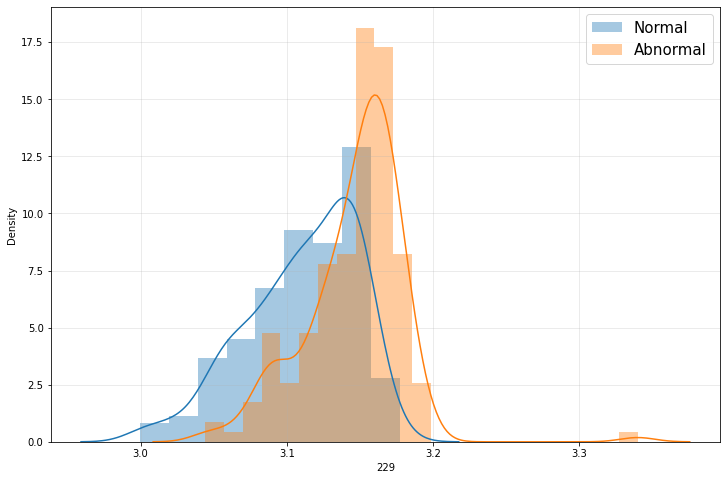

In [ ]:
# P-value Rank (0 ~ 269)
FeatureRank = 60

# PDF Chart
plt.figure(figsize=(12,8))
sb.distplot(Normal_FeatureData.iloc[int(P_value_Rank.iloc[FeatureRank,0])  ,:], label = 'Normal')
sb.distplot(Abnormal_FeatureData.iloc[int(P_value_Rank.iloc[FeatureRank,0]),:], label = 'Abnormal')
plt.legend(loc='upper right', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

## Select Top Features Having Low P-values

In [ ]:
Rank = 30  # Select number of rank

Normal   = np.zeros((Rank,NoOfData))
Abnormal = np.zeros((Rank,NoOfData))

for i in range(Rank):
    
    index         = int(P_value_Rank.iloc[i,0])
    Normal[i,:]   = Normal_FeatureData.iloc[index,:].values
    Abnormal[i,:] = Abnormal_FeatureData.iloc[index,:].values
   
FeatureSelected = pd.DataFrame(np.concatenate([Normal, Abnormal] , axis=1))

print("Selected Feature Data Size :", FeatureSelected.shape)

Selected Feature Data Size : (30, 360)


## Save Finally Selected Feature Data in Drive (.csv)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/SavedFiles/FeatureSelected.csv'
FeatureSelected.to_csv(path, sep=',', header=None, index=None)